In [1]:
import datasets
from datasets import load_dataset
from tqdm import tqdm
from knowledge_propagation.utils import vars, io, extractor
from scipy.stats import describe
from typing import List, Dict
import re
from copy import deepcopy
import pandas as pd

from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
artworks = [
    "Mona Lisa",
    "The Starry Night",
    "The Persistence of Memory",
    "Girl with a Pearl Earring",
    "The Last Supper",
    "Guernica",
    "The Scream",
    "American Gothic",
    "The Night Watch",
    "The Birth of Venus",
    "The Kiss",
    "The Arnolfini Portrait",
    "Liberty Leading the People",
    "The Garden of Earthly Delights",
    "Las Meninas",
    "Whistler's Mother",
    "Impression, Sunrise",
    "Nighthawks",
    "The Great Wave off Kanagawa",
    "A Sunday Afternoon on the Island of La Grande Jatte"
] + [
    "The Thinker",
    "David",
    "Venus de Milo",
    "The Ecstasy of Saint Teresa",
    "Nike of Samothrace",
    "The Gates of Hell",
    "Manneken Pis",
    "Cloud Gate",
    "Balloon Dog",
    "Bird in Space",
    "The Burghers of Calais",
    "Love",
    "Endless Column",
    "Unique Forms of Continuity in Space",
    "Fountain",
    "Maman",
    "Sky Mirror",
    "The Beanery",
    "Spiral Jetty",
    "Vietnam Veterans Memorial"
]
artworks = list(set(artworks))
len(artworks)

40

In [3]:
books = [
    "To Kill a Mockingbird",
    "1984",
    "Pride and Prejudice",
    "The Great Gatsby",
    "Moby-Dick",
    "War and Peace",
    "The Catcher in the Rye",
    "Jane Eyre",
    "The Lord of the Rings",
    "The Hobbit",
    "Crime and Punishment",
    "Brave New World",
    "Wuthering Heights",
    "Anna Karenina",
    "The Brothers Karamazov",
    "The Adventures of Huckleberry Finn",
    "One Hundred Years of Solitude",
    "The Picture of Dorian Gray",
    "Great Expectations",
    "Don Quixote"
] + [
    "The Chronicles of Narnia",
    "Frankenstein",
    "Dracula",
    "Les Misérables",
    "The Alchemist",
    "The Count of Monte Cristo",
    "The Old Man and the Sea",
    "Slaughterhouse-Five",
    "The Grapes of Wrath",
    "The Bell Jar",
    "A Tale of Two Cities",
    "The Kite Runner",
    "Life of Pi",
    "The Road",
    "Catch-22",
    "The Stranger",
    "Beloved",
    "The Sound and the Fury",
    "The Handmaid's Tale",
    "The Name of the Rose"
]
books = list(set(books))
len(books)

40

In [4]:
films = [
    "The Godfather",                    # USA, Crime/Drama
    "Parasite",                         # South Korea, Thriller/Drama
    "Spirited Away",                    # Japan, Animation/Fantasy
    "City of God",                      # Brazil, Crime/Drama
    "Pulp Fiction",                     # USA, Crime/Drama
    "Amélie",                           # France, Romantic Comedy
    "The Lion King",                    # USA, Animation/Drama
    "Crouching Tiger, Hidden Dragon",    # China, Action/Drama
    "The Intouchables",                 # France, Drama/Comedy
    "Roma",                             # Mexico, Drama
    "12 Angry Men",                     # USA, Drama
    "Schindler's List",                 # USA, Historical Drama
    "Pan's Labyrinth",                  # Mexico/Spain, Fantasy/War
    "The Seventh Seal",                 # Sweden, Drama/Fantasy
    "Oldboy",                           # South Korea, Thriller/Action
    "Inception",                        # USA, Sci-Fi/Thriller
    "The Godfather: Part II",           # USA, Crime/Drama
    "Run Lola Run",                     # Germany, Thriller/Action
    "La Dolce Vita",                    # Italy, Drama
    "The Farewell",                     # USA/China, Drama/Comedy
] + [
    "Citizen Kane",                     # USA, Drama/Mystery
    "Life is Beautiful",                 # Italy, Comedy/Drama
    "The Dark Knight",                   # USA, Action/Crime
    "The Matrix",                        # USA, Sci-Fi/Action
    "A Separation",                      # Iran, Drama
    "The Grand Budapest Hotel",          # USA, Comedy/Drama
    "Memento",                           # USA, Mystery/Thriller
    "The Battle of Algiers",             # Algeria, War/Drama
    "Gladiator",                         # USA, Action/Drama
    "The Shining",                       # USA, Horror/Drama
    "The Pianist",                       # France/Poland, Drama/Music
    "Moonlight",                         # USA, Drama
    "Goodfellas",                        # USA, Crime/Drama
    "The Green Mile",                    # USA, Drama/Fantasy
    "The Matrix Reloaded",               # USA, Sci-Fi/Action
    "Spartacus",                         # USA, Historical/Drama
    "Taxi Driver",                       # USA, Drama/Crime
    "Casablanca",                        # USA, Romance/Drama
    "Birdman",                           # USA, Drama/Comedy
    "Into the Wild",                     # USA, Adventure/Drama
]
films = list(set(films))
len(films)

40

In [5]:
songs = [
    "Bohemian Rhapsody",              # Queen, Rock
    "Imagine",                        # John Lennon, Pop/Soft Rock
    "Despacito",                      # Luis Fonsi ft. Daddy Yankee, Reggaeton/Pop
    "Like a Rolling Stone",           # Bob Dylan, Rock/Folk
    "Shape of You",                   # Ed Sheeran, Pop
    "Billie Jean",                    # Michael Jackson, Pop
    "Ode to Joy",                     # Ludwig van Beethoven, Classical
    "Gangnam Style",                  # Psy, K-pop/Pop
    "What's Going On",                # Marvin Gaye, Soul/R&B
    "Hallelujah",                     # Leonard Cohen, Folk/Rock
    "Smells Like Teen Spirit",        # Nirvana, Grunge/Rock
    "Africa",                         # Toto, Rock/Pop
    "Creep",                          # Radiohead, Alternative Rock
    "No Woman, No Cry",               # Bob Marley, Reggae
    "La Bamba",                       # Ritchie Valens, Rock/Latin
    "My Heart Will Go On",            # Celine Dion, Pop/Film Soundtrack
    "Formation",                      # Beyoncé, R&B/Pop
    "Stairway to Heaven",             # Led Zeppelin, Rock
    "Desire",                         # U2, Rock
    "Take Five",                      # Dave Brubeck, Jazz
] + [
    "Respect",                         # Aretha Franklin, Soul/R&B
    "Rolling in the Deep",             # Adele, Pop/Soul
    "What a Wonderful World",          # Louis Armstrong, Jazz/Pop
    "Purple Haze",                     # Jimi Hendrix, Rock
    "One Love",                        # Bob Marley, Reggae
    "I Will Always Love You",          # Whitney Houston, Pop/R&B
    "Sweet Child O' Mine",             # Guns N' Roses, Rock
    "Blinding Lights",                 # The Weeknd, Pop
    "Superstition",                    # Stevie Wonder, Funk/Soul
    "Lose Yourself",                   # Eminem, Hip-Hop/Rap
    "Ain't No Mountain High Enough",   # Marvin Gaye & Tammi Terrell, Soul
    "Rolling Stone",                   # The Rolling Stones, Rock
    "Hey Jude",                        # The Beatles, Rock/Pop
    "Smells Like Teen Spirit",         # Nirvana, Grunge/Rock
    "Viva La Vida",                    # Coldplay, Pop/Rock
    "Bohemian Rhapsody",               # Queen, Rock
    "Toxic",                           # Britney Spears, Pop
    "Eye of the Tiger",                # Survivor, Rock
    "Uptown Funk",                     # Mark Ronson ft. Bruno Mars, Funk/Pop
]
songs = list(set(songs))
len(songs)

37

In [6]:
companies = [
    "Apple",                           # USA, Technology
    "Samsung",                         # South Korea, Electronics
    "Toyota",                          # Japan, Automotive
    "Nike",                            # USA, Apparel/Footwear
    "Alibaba",                         # China, E-commerce/Technology
    "Google",                          # USA, Technology
    "Amazon",                          # USA, E-commerce/Technology
    "Tesla",                           # USA, Automotive/Technology
    "BMW",                             # Germany, Automotive
    "Coca-Cola",                       # USA, Beverages
    "Microsoft",                       # USA, Technology
    "Nestlé",                          # Switzerland, Food & Beverage
    "Sony",                            # Japan, Electronics/Entertainment
    "Walmart",                         # USA, Retail
    "Huawei",                          # China, Telecommunications/Technology
    "McDonald's",                      # USA, Fast Food
    "Disney",                          # USA, Entertainment
    "Volkswagen",                      # Germany, Automotive
    "Unilever",                        # UK/Netherlands, Consumer Goods
    "Starbucks",                       # USA, Coffeehouse Chain
] + [
    "Facebook",                        # USA, Social Media/Technology
    "PepsiCo",                         # USA, Food & Beverage
    "Intel",                           # USA, Technology
    "Airbnb",                          # USA, Technology/Hospitality
    "L'Oréal",                         # France, Cosmetics
    "LinkedIn",                        # USA, Social Media/Technology
    "Uber",                            # USA, Technology/Transportation
    "Johnson & Johnson",               # USA, Healthcare
    "Spotify",                         # Sweden, Technology/Entertainment
    "Bayer",                           # Germany, Pharmaceuticals
    "Netflix",                         # USA, Entertainment/Technology
    "Shell",                           # Netherlands/UK, Energy
    "General Electric",                # USA, Conglomerate/Technology
    "Siemens",                         # Germany, Engineering/Technology
    "Dell Technologies",               # USA, Technology
    "Volkswagen Group",                # Germany, Automotive
    "Ford",                            # USA, Automotive
    "H&M",                             # Sweden, Retail/Fashion
    "Walt Disney Company",             # USA, Entertainment
    "Zara",                            # Spain, Retail/Fashion
]
companies = list(set(companies))
len(companies)

40

In [7]:
non_profit_organizations = [
    "Red Cross",                       # International, Humanitarian
    "Doctors Without Borders",         # International, Healthcare
    "Amnesty International",           # International, Human Rights
    "World Wildlife Fund",       # International, Environmental
    "UNICEF",                          # International, Child Advocacy
    "Oxfam",                           # International, Poverty Relief
    "Greenpeace",                      # International, Environmental
    "Habitat for Humanity",            # USA/International, Housing
    "World Food Programme",            # International, Hunger Relief
    "The Nature Conservancy",          # USA/International, Environmental
    "Save the Children",               # International, Child Welfare
    "Human Rights Watch",              # International, Human Rights
    "The Salvation Army",              # International, Social Services
    "International Red Crescent",      # International, Humanitarian
    "Charity: Water",                  # USA/International, Clean Water
    "The Humane Society",              # USA, Animal Rights
    "PETA",                            # USA, Animal Rights
    "Global Fund for Women",           # International, Gender Equality
    "Bill & Melinda Gates Foundation", # USA, Global Health/Development
    "World Health Organization", # International, Healthcare
] + [
    "The Red Crescent",               # International, Humanitarian
    "The Carter Center",              # USA, Peace and Health
    "World Vision",                   # International, Child Advocacy/Poverty Relief
    "CARE",                           # International, Humanitarian Aid
    "Rainforest Alliance",            # International, Environmental
    "National Public Radio",    # USA, Media/News
    "Big Brothers Big Sisters",       # USA, Mentorship/Social Services
    "The ACLU",                       # USA, Civil Liberties
    "Friends of the Earth",           # International, Environmental
    "Lymphoma Research Foundation",   # USA, Healthcare/Research
    "The Ford Foundation",            # USA, Social Justice
    "The American Cancer Society",    # USA, Healthcare/Research
    "The Rotary Foundation",          # International, Community Development
    "Teach for America",              # USA, Education
    "Doctors for Africa",             # Africa, Healthcare
    "The Global Alliance for Clean Cookstoves",  # International, Environmental/Health
    "Bridges to Prosperity",          # International, Infrastructure/Development
    "Tearfund",                       # International, Poverty Relief/Christian
    "Boys & Girls Clubs of America",  # USA, Youth Development
    "Médecins Sans Frontières", # International, Healthcare
]
non_profit_organizations = list(set(non_profit_organizations))
len(non_profit_organizations)

40

In [8]:
languages = [
    "English",                # Widely spoken worldwide, official language in many countries
    "Mandarin Chinese",       # Most spoken language in the world (China)
    "Spanish",                # Spoken widely in Spain, Latin America, and parts of the USA
    "Hindi",                  # Widely spoken in India and Nepal
    "Arabic",                 # Spoken in many countries in the Middle East and North Africa
    "French",                 # Spoken in France, parts of Canada, and many African countries
    "Bengali",                # Spoken in Bangladesh and parts of India
    "Russian",                # Spoken in Russia and many former Soviet states
    "Portuguese",             # Spoken in Portugal, Brazil, and parts of Africa
    "Japanese",               # Spoken primarily in Japan
    "Punjabi",                # Spoken in India and Pakistan
    "German",                 # Spoken in Germany, Austria, Switzerland
    "Italian",                # Spoken in Italy and parts of Switzerland
    "Turkish",                # Spoken in Turkey and Cyprus
    "Korean",                 # Spoken in South and North Korea
    "Vietnamese",             # Spoken in Vietnam
    "Telugu",                 # Spoken in India
    "Tamil",                  # Spoken in India and Sri Lanka
    "Swahili",                # Spoken in East Africa, including Kenya, Tanzania, and parts of other countries
] + [
    "Malay",                   # Spoken in Malaysia, Singapore, and parts of Indonesia
    "Haitian Creole",          # Spoken in Haiti
    "Thai",                    # Spoken in Thailand
    "Persian (Farsi)",         # Spoken in Iran, Afghanistan, and Tajikistan
    "Dutch",                   # Spoken in the Netherlands, Belgium, and Suriname
    "Greek",                   # Spoken in Greece and Cyprus
    "Hebrew",                  # Spoken in Israel
    "Swedish",                 # Spoken in Sweden and parts of Finland
    "Cantonese",               # Spoken in Hong Kong, parts of China, and overseas Chinese communities
    "Polish",                  # Spoken in Poland
    "Romanian",                # Spoken in Romania and Moldova
    "Ukrainian",               # Spoken in Ukraine
    "Malayalam",               # Spoken in Kerala, India
    "Serbian",                 # Spoken in Serbia and parts of surrounding countries
    "Gujarati",                # Spoken in Gujarat, India
    "Kazakh",                  # Spoken in Kazakhstan
    "Nepali",                  # Spoken in Nepal and parts of India
    "Sinhala",                 # Spoken in Sri Lanka
    "Burmese",                 # Spoken in Myanmar (Burma)
    "Afrikaans",               # Spoken in South Africa and Namibia
]
languages = list(set(languages))
len(languages)

39

In [9]:
universities = [
    "Harvard University",             # USA
    "University of Oxford",           # UK
    "Stanford University",            # USA
    "University of Cambridge",        # UK
    "Massachusetts Institute of Technology",  # USA
    "California Institute of Technology", # USA
    "University of Tokyo",            # Japan
    "ETH Zurich",                     # Switzerland
    "University of Melbourne",        # Australia
    "Tsinghua University",            # China
    "Princeton University",           # USA
    "Yale University",                # USA
    "University of Chicago",          # USA
    "University of Paris", # France
    "University of Toronto",          # Canada
    "Imperial College London",        # UK
    "Peking University",              # China
    "University of Cape Town",        # South Africa
    "University of São Paulo",       # Brazil
    "Indian Institute of Technology Bombay", # India
] + [
    "Columbia University",            # USA
    "University of California, Berkeley", # USA
    "University of Melbourne",        # Australia
    "Swiss Federal Institute of Technology", # Switzerland
    "University of Hong Kong",        # Hong Kong
    "University of Edinburgh",        # UK
    "University of California, Los Angeles",  # USA
    "University of Michigan",         # USA
    "National University of Singapore", # Singapore
    "University of Amsterdam",        # Netherlands
    "University of Sydney",           # Australia
    "Seoul National University",      # South Korea
    "University of Delhi",            # India
    "McGill University",              # Canada
    "University of Buenos Aires",     # Argentina
    "Australian National University", # Australia
    "Purdue University",              # USA
    "Lund University",                # Sweden
    "University of Cape Town",        # South Africa
    "University of São Paulo",       # Brazil
]
universities = list(set(universities))
len(universities)

37

In [10]:
historical_events = [
    "Fall of the Roman Empire",
    "Signing of the Magna Carta",
    "Black Death",
    "Fall of Constantinople",
    "Columbus Reaches the Americas",
    "Protestant Reformation",
    "Defeat of the Spanish Armada",
    "English Civil War",
    "American Revolution",
    "French Revolution",
    "Industrial Revolution",
    "Napoleonic Wars",
    "American Civil War",
    "Abolition of Slavery in the US",
    "World War I",
    "Russian Revolution",
    "Great Depression",
    "World War II",
    "Civil Rights Movement",
    "Moon Landing"
] + [
    "The Rise of the Mongol Empire",
    "The Viking Invasions",
    "The Reign of Alexander the Great",
    "The Battle of Hastings",
    "The Renaissance",
    "The Invention of the Printing Press",
    "The Spanish Conquest of the Aztecs",
    "The Rise of Nazi Germany",
    "The Cuban Missile Crisis",
    "The Vietnam War",
    "The Cold War",
    "The Berlin Wall Construction",
    "The Sinking of the Titanic",
    "The Korean War",
    "The Collapse of the Soviet Union",
    "The 9/11 Attacks",
    "The End of Apartheid in South Africa"
] + [
    "The Assassination of Julius Caesar",
    "The Trial of Galileo",
    "The Industrial Revolution in Britain",
    "The French and Indian War",
    "The Opium Wars",
    "The Taiping Rebellion",
    "The Battle of Waterloo",
    "The Sepoy Rebellion",
    "The Founding of the United Nations",
    "The Boston Tea Party",
    "The Haitian Revolution",
    "The Discovery of Penicillin",
    "The D-Day Invasion",
    "The Signing of the Treaty of Versailles",
    "The Great Fire of London",
    "The California Gold Rush",
    "The Establishment of the European Union",
    "The Rise of the Ottoman Empire",
    "The Discovery of America by Leif Erikson",
    "The Surrender of Japan in WWII"
] + [
    "The Founding of Rome",
    "The Construction of the Great Wall of China",
    "The Treaty of Tordesillas",
    "The Trial of Socrates",
    "The Establishment of the Ming Dynasty",
    "The Burning of the Library of Alexandria",
    "The Siege of Jerusalem (70 AD)",
    "The Battle of Thermopylae",
    "The Discovery of the New World by the Vikings",
    "The Formation of the League of Nations",
    "The Rise of the Aztec Empire",
    "The Signing of the Declaration of Independence (USA)",
    "The Creation of the European Common Market",
    "The Fall of the Berlin Wall",
    "The Establishment of the People's Republic of China",
    "The Beginning of the Cold War",
    "The Partition of India and Pakistan",
    "The Assassination of Archduke Franz Ferdinand",
] + [
    "The Signing of the Treaty of Paris (1783)",
    "The Reign of Charlemagne",
    "The Discovery of America by Christopher Columbus",
    "The Battle of Gettysburg",
    "The Assassination of John F. Kennedy",
    "The Invention of the Telegraph",
    "The Execution of King Louis XVI",
    "The Building of the Pyramids of Egypt",
    "The First Crusade",
    "The Emancipation Proclamation",
    "The Invention of the Steam Engine",
    "The Storming of the Bastille",
    "The Launch of Sputnik 1",
    "The Launch of the Internet",
    "The Founding of the United States of America"
] + [
    "The Discovery of the Dead Sea Scrolls",
    "The Construction of the Parthenon",
    "The Execution of Marie Antoinette",
    "The Invention of the Airplane",
    "The Berlin Airlift",
    "The Battle of Stalingrad",
    "The Battle of Midway",
    "The Cuban Revolution",
    "The End of the Mongol Empire",
    "The Treaty of Westphalia",
    "The Formation of the British Empire",
    "The Great Schism",
    "The Founding of the Republic of South Africa",
    "The Sinking of the Lusitania",
    "The Montgomery Bus Boycott",
    "The Creation of the Internet"
]
historical_events = list(set(historical_events))
len(historical_events)

106

In [11]:
species = [
    "African Elephant",               # Mammal, Africa
    "Bald Eagle",                     # Bird, North America
    "Great White Shark",              # Fish, Global
    "King Cobra",                     # Reptile, Asia
    "Giant Panda",                    # Mammal, China
    "Blue Whale",                     # Mammal, Global Oceans
    "Komodo Dragon",                  # Reptile, Indonesia
    "Lion",                           # Mammal, Africa
    "Kangaroo",                       # Mammal, Australia
    "Polar Bear",                     # Mammal, Arctic
    "Green Sea Turtle",               # Reptile, Oceans
    "Red Panda",                      # Mammal, Asia
    "Snow Leopard",                   # Mammal, Asia
    "Cheetah",                        # Mammal, Africa
    "Humpback Whale",                 # Mammal, Oceans
    "Orangutan",                      # Mammal, Southeast Asia
    "Penguin",                        # Bird, Antarctica
    "Zebra",                          # Mammal, Africa
    "Tiger",                          # Mammal, Asia
    "Giraffe",                        # Mammal, Africa
] + [
    "Jaguar",                         # Mammal, South America
    "Panda",                          # Mammal, China
    "Gorilla",                        # Mammal, Africa
    "Crocodile",                      # Reptile, Global
    "Vulture",                        # Bird, Global
    "Rhinoceros",                     # Mammal, Africa/Asia
    "Octopus",                        # Marine, Global Oceans
    "Chameleon",                      # Reptile, Africa/Asia
    "Wolf",                           # Mammal, North America/Europe
    "Moose",                          # Mammal, North America
    "Hippopotamus",                   # Mammal, Africa
    "Caiman",                         # Reptile, South America
    "Whale Shark",                    # Fish, Oceans
    "Albatross",                      # Bird, Oceans
    "Sloth",                          # Mammal, South America
    "Hedgehog",                       # Mammal, Europe/Asia
    "Peacock",                        # Bird, Asia
    "Bison",                          # Mammal, North America
    "Pufferfish",                     # Fish, Oceans
    "Gibbon",                         # Mammal, Southeast Asia
] + [
    "Elephant Seal",                  # Mammal, Oceans
    "Red Fox",                        # Mammal, Global
    "Puma",                           # Mammal, Americas
    "Cheetah",                        # Mammal, Africa
    "Emperor Penguin",                # Bird, Antarctica
    "Mountain Gorilla",               # Mammal, Africa
    "Mantis Shrimp",                  # Marine, Oceans
    "Cuttlefish",                     # Marine, Oceans
    "Dolphin",                        # Marine Mammal, Global Oceans
    "Snowy Owl",                      # Bird, North America/Europe
    "Axolotl",                        # Amphibian, Mexico
    "Lynx",                           # Mammal, North America/Europe
    "Wolverine",                      # Mammal, North America/Asia
    "Caiman Lizard",                  # Reptile, South America
    "Andean Condor",                  # Bird, South America
    "Siberian Tiger",                 # Mammal, Asia
    "Great Horned Owl",               # Bird, Americas
    "Raccoon",                         # Mammal, North America
    "Praying Mantis",                 # Insect, Global
    "Giant Clam",                     # Marine, Oceans
] + [
    "Arctic Fox",                    # Mammal, Arctic
    "Siberian Husky",                 # Mammal, North America/Asia
    "Mandrill",                       # Mammal, Africa
    "Spotted Hyena",                  # Mammal, Africa
    "American Alligator",             # Reptile, North America
    "Harpy Eagle",                    # Bird, Central/South America
    "Great Barrier Reef Clownfish",   # Fish, Australia
    "Tasmanian Devil",                # Mammal, Australia
    "Pangolin",                       # Mammal, Africa/Asia
    "Komodo Dragon",                  # Reptile, Indonesia
    "Bald Ibis",                      # Bird, North Africa/Middle East
    "Okapi",                          # Mammal, Central Africa
    "Kea",                            # Bird, New Zealand
    "Wolverine",                      # Mammal, North America/Asia
    "Nile Crocodile",                 # Reptile, Africa
    "Saiga Antelope",                 # Mammal, Central Asia
    "Platypus",                       # Mammal, Australia
    "Pygmy Hippo",                    # Mammal, West Africa
    "Vervet Monkey",                  # Mammal, Africa
    "Fossa",                          # Mammal, Madagascar
] + [
    "African Wild Dog",              # Mammal, Africa
    "Bengal Tiger",                  # Mammal, India/Bangladesh
    "Axolotl",                       # Amphibian, Mexico
    "Giant Anteater",                # Mammal, South America
    "Zebu",                          # Mammal, South Asia/Africa
    "Wildebeest",                    # Mammal, Africa
    "Red-shouldered Hawk",           # Bird, North America
    "Cuttlefish",                    # Marine, Oceans
    "Seahorse",                      # Marine, Oceans
    "Snow Leopard",                  # Mammal, Asia
    "Pygmy Marmoset",                # Mammal, South America
    "Swan",                          # Bird, Global
    "Marmot",                        # Mammal, North America/Europe
    "African Grey Parrot",           # Bird, Central Africa
    "Quokka",                        # Mammal, Australia
    "Indian Star Tortoise",          # Reptile, India/Sri Lanka
    "California Condor",             # Bird, North America
    "Orca",                          # Marine Mammal, Global Oceans
    "Mandrill",                      # Mammal, Central Africa
    "Red-Eyed Tree Frog"             # Amphibian, Central America
]
species = list(set(species))
species = [s.lower() for s in species]
len(species)

93

In [12]:
historical_figures = [
    "Albert Einstein",             # Physicist, Germany/USA
    "Mahatma Gandhi",              # Leader, India
    "Leonardo da Vinci",           # Artist/Inventor, Italy
    "Nelson Mandela",              # Political Leader, South Africa
    "Marie Curie",                 # Scientist, Poland/France
    "Winston Churchill",           # Politician, UK
    "Cleopatra",                   # Queen, Egypt
    "Martin Luther King Jr.",      # Civil Rights Leader, USA
    "Socrates",                    # Philosopher, Greece
    "William Shakespeare",         # Playwright, England
    "Abraham Lincoln",             # Politician, USA
    "Rosa Parks",                  # Civil Rights Activist, USA
    "Charles Darwin",              # Scientist, UK
    "Alexander the Great",         # Conqueror, Ancient Macedonia
    "Frida Kahlo",                 # Artist, Mexico
    "Julius Caesar",               # Military Leader, Ancient Rome
    "Cleopatra VII",               # Queen, Egypt
    "Mao Zedong",                  # Political Leader, China
    "Queen Victoria",              # Monarch, UK
    "Isaac Newton",                # Scientist, UK
] + [
    "JFK (John F. Kennedy)",           # Politician, USA
    "Joan of Arc",                    # Military Leader, France
    "Pablo Picasso",                  # Artist, Spain
    "Genghis Khan",                   # Conqueror, Mongolia
    "Moses",                          # Religious Leader, Ancient Israel
    "Nelson Mandela",                 # Political Leader, South Africa
    "Thomas Edison",                  # Inventor, USA
    "Cleopatra VII",                  # Queen, Egypt
    "Vladimir Lenin",                 # Political Leader, Russia
    "Florence Nightingale",           # Nurse, UK
    "Ada Lovelace",                   # Mathematician, UK
    "Buddha (Siddhartha Gautama)",    # Religious Leader, India
    "Alexander Hamilton",             # Founding Father, USA
    "Vera Wang",                      # Fashion Designer, USA
    "Marie Antoinette",               # Queen, France
    "Napoleon Bonaparte",             # Military Leader, France
    "Emmeline Pankhurst",             # Suffragette, UK
    "Albert Schweitzer",              # Philosopher/Physician, France/Germany
    "Hannibal Barca",                 # Military Commander, Carthage
    "Wright Brothers",                # Inventors, USA
] + [
    "Confucius",                     # Philosopher, China
    "Theodore Roosevelt",             # Politician, USA
    "Che Guevara",                   # Revolutionary, Argentina/Cuba
    "Guglielmo Marconi",              # Inventor, Italy
    "Charles Dickens",                # Writer, UK
    "Hedy Lamarr",                    # Actress/Inventor, Austria/USA
    "Benjamin Franklin",              # Founding Father, USA
    "Sigmund Freud",                  # Psychoanalyst, Austria
    "Mahatma Gandhi",                 # Political Leader, India
    "Henry VIII",                     # Monarch, England
    "Marco Polo",                     # Explorer, Italy
    "Susan B. Anthony",               # Women's Rights Activist, USA
    "Malala Yousafzai",               # Education Activist, Pakistan
    "Simón Bolívar",                  # Revolutionary Leader, South America
    "Catherine the Great",            # Monarch, Russia
    "Vincent van Gogh",               # Artist, Netherlands
    "William Wallace",                # Military Leader, Scotland
    "Sally Ride",                     # Astronaut, USA
    "Langston Hughes",                # Poet, USA
    "Ramses II",                      # Pharaoh, Egypt
] + [
    "Leonardo da Vinci",              # Renaissance polymath, Italy
    "Wright Brothers",                # Inventors, USA
    "Laozi (Lao Tzu)",                # Philosopher, China
    "John Locke",                     # Philosopher, England
    "Pablo Neruda",                   # Poet, Chile
    "Mikhail Gorbachev",              # Political Leader, USSR
    "Florence Nightingale",           # Nurse, UK
    "Indira Gandhi",                  # Political Leader, India
    "Karl Marx",                      # Philosopher, Germany
    "Sun Tzu",                        # Military Strategist, China
    "Mark Twain",                     # Writer, USA
    "Albert Einstein",                # Physicist, Germany/USA
    "Nelson Mandela",                 # Political Leader, South Africa
    "Helen Keller",                   # Activist, USA
    "Coco Chanel",                    # Fashion Designer, France
    "Tupac Shakur",                   # Musician, USA
    "Michael Jackson",                # Musician, USA
    "Jackie Robinson",                # Athlete, USA
    "Rosa Parks",                     # Civil Rights Activist, USA
    "Elvis Presley",                  # Musician, USA
] + [
    "Isaac Newton",
    "Cleopatra",
    "George Washington",
    "Socrates",
    "Catherine the Great",
    "William Shakespeare",
    "Confucius",
    "Marie Antoinette",
    "Nelson Mandela",
    "Homer",
    "Machiavelli",
    "Franklin D. Roosevelt",
    "Genghis Khan",
    "William the Conqueror",
    "Vladimir Lenin",
    "Pablo Picasso",
    "Moses",
    "Charles de Gaulle",
    "Queen Victoria",
    "Vincent van Gogh"
] + [
    "Plato",
    "Benjamin Franklin",
    "Alexander Hamilton",
    "Marco Polo",
    "Mother Teresa",
    "Gandhi",
    "Louis Pasteur",
    "Mahatma Gandhi",
    "Florence Nightingale",
    "Abraham Lincoln",
    "Nelson Mandela",
    "Fidel Castro",
    "Che Guevara",
    "Aristotle",
    "Napoleon Bonaparte",
    "Henry VIII",
    "Thomas Jefferson",
    "JFK (John F. Kennedy)",
    "Tudors",
    "Helen Keller"
] + [
    "Guglielmo Marconi",
    "Harriet Tubman",
    "John Locke",
    "Vasco da Gama",
    "Emmeline Pankhurst",
    "Karl Marx",
    "William Wordsworth",
    "King Tutankhamun",
    "Thomas Paine",
    "Sun Tzu",
    "Michael Faraday",
    "King Henry IV",
    "Geronimo",
    "Buddha",
    "Ramses II",
    "Sitting Bull",
    "Eleanor Roosevelt",
    "Mikhail Gorbachev",
    "Franz Kafka",
    "Marie Curie"
]
historical_figures = list(set(historical_figures))
len(historical_figures)

97

In [13]:
softwares = [
    "Microsoft Windows",        # Operating System
    "MacOS",                    # Operating System
    "Linux",                    # Operating System
    "Adobe Photoshop",          # Image Editing
    "Google Chrome",            # Web Browser
    "Mozilla Firefox",          # Web Browser
    "Microsoft Office",         # Productivity Suite
    "Slack",                    # Communication/Collaboration
    "Zoom",                     # Video Conferencing
    "Spotify",                  # Music Streaming
    "IntelliJ IDEA",            # Integrated Development Environment (IDE)
    "Visual Studio Code",       # Integrated Development Environment (IDE)
    "Git",                      # Version Control
    "AutoCAD",                  # CAD Software
    "Blender",                  # 3D Modeling/Animation
    "WordPress",                # Content Management System (CMS)
    "QuickBooks",               # Accounting Software
    "Python",                   # Programming Language
    "Oracle Database",          # Database Management System
    "Final Cut Pro",            # Video Editing Software
] + [
    "Adobe Illustrator",          # Graphic Design Software
    "Skype",                      # Communication Software
    "Dropbox",                    # Cloud Storage
    "Trello",                     # Project Management
    "Notepad++",                  # Text Editor
    "GitHub",                     # Version Control/Collaboration Platform
    "Salesforce",                 # Customer Relationship Management (CRM)
    "Amazon Web Services (AWS)",  # Cloud Computing
    "VMware",                     # Virtualization Software
    "Figma",                      # Design and Prototyping Tool
    "Unity",                      # Game Development Engine
    "Unreal Engine",              # Game Development Engine
    "Adobe Premiere Pro",         # Video Editing Software
    "Sketch",                     # UI/UX Design Tool
    "MATLAB",                     # Numerical Computing
    "Sublime Text",               # Code Editor
    "Tableau",                    # Data Visualization Software
    "VLC Media Player",           # Media Player
    "Eclipse",                    # Integrated Development Environment (IDE)
    "Windows Media Player",       # Media Player
] + [
    "Microsoft Excel",            # Spreadsheet Software
    "Adobe Lightroom",            # Photo Editing Software
    "Pro Tools",                  # Audio Editing Software
    "Krita",                      # Digital Painting Software
    "Inkscape",                   # Vector Graphic Design Software
    "WordPress",                  # Content Management System (CMS)
    "RStudio",                    # Statistical Computing and Graphics
    "PostgreSQL",                 # Database Management System
    "Docker",                     # Containerization Platform
    "Jenkins",                    # Continuous Integration/Delivery Tool
    "Atlassian Jira",             # Project and Issue Tracking Software
    "Final Draft",                # Screenwriting Software
    "Ableton Live",               # Music Production Software
    "Android Studio",             # Mobile App Development (Android)
    "Xcode",                      # Mobile App Development (iOS)
    "Microsoft Teams",            # Collaboration/Communication Platform
    "Sequel Pro",                 # MySQL Database Management
    "Autodesk Revit",             # Building Information Modeling (BIM)
    "Blender",                    # 3D Modeling/Animation
    "Google Drive",               # Cloud Storage/Collaboration
]
softwares = list(set(softwares))
len(softwares)

58

In [14]:
inventions = [
    "Telephone",                   # Invented by Alexander Graham Bell
    "Light Bulb",                  # Invented by Thomas Edison
    "Airplane",                    # Invented by Wright Brothers
    "Printing Press",              # Invented by Johannes Gutenberg
    "Wheel",                       # Ancient invention, Mesopotamia
    "Internet",                    # Developed by multiple inventors
    "Penicillin",                  # Discovered by Alexander Fleming
    "Computer",                    # Developed by Charles Babbage, Alan Turing
    "Steam Engine",                # Developed by James Watt
    "Refrigerator",                # Invented by Carl von Linde
    "Radio",                       # Invented by Guglielmo Marconi
    "Television",                  # Invented by John Logie Baird
    "Vaccination",                 # Pioneered by Edward Jenner
    "Camera",                      # Invented by Joseph Nicéphore Niépce
    "Electric Motor",              # Developed by Michael Faraday
    "Computer Mouse",              # Invented by Douglas Engelbart
    "Bicycle",                     # Invented by Karl Drais
    "Helicopter",                  # Invented by Igor Sikorsky
    "Automobile",                  # Invented by Karl Benz
] + [
    "Solar Panel",                # Developed by Charles Fritts
    "Microscope",                 # Invented by Zacharias Janssen
    "Printing Press",             # Invented by Johannes Gutenberg
    "Steam Locomotive",           # Developed by George Stephenson
    "Typewriter",                 # Invented by Christopher Latham Sholes
    "Battery",                    # Invented by Alessandro Volta
    "Compass",                    # Ancient invention, China
    "X-ray",                      # Discovered by Wilhelm Röntgen
    "Calculator",                 # Developed by Blaise Pascal
    "Eyeglasses",                 # Invented by Salvino D'Armate
    "AC Power",                   # Developed by Nikola Tesla
    "Antibiotics",                # Discovered by Alexander Fleming
    "Telegraph",                  # Invented by Samuel Morse
    "Hot Air Balloon",            # Invented by Montgolfier brothers
    "Radiosurgery",               # Developed by Sir Charles Beadnell
    "Jet Engine",                 # Invented by Frank Whittle
    "Contact Lenses",             # Invented by Otto Wichterle
    "Electric Fan",               # Invented by Schuyler Skaats Wheeler
    "Vacuum Cleaner",             # Invented by Hubert Cecil Booth
    "Paper",                      # Ancient invention, China
] + [
    "Barometer",                   # Invented by Evangelista Torricelli
    "Aluminum Foil",               # Invented by L. H. L. Dumas
    "Electric Guitar",             # Invented by Les Paul
    "Lighthouse",                  # Ancient invention, Greece
    "Fountain Pen",                # Invented by Lewis Waterman
    "Refrigerated Truck",          # Invented by Frederick McKinley Jones
    "Steamship",                   # Developed by Robert Fulton
    "Telescope",                   # Invented by Hans Lippershey
    "Match",                       # Invented by John Walker
    "Windmill",                    # Ancient invention, Persia
    "Hot Dog",                     # Invented by Charles Feltman
    "Parachute",                   # Invented by Leonardo da Vinci
    "Piano",                       # Invented by Bartolomeo Cristofori
    "Thermometer",                 # Developed by Galileo Galilei
    "Dynamite",                    # Invented by Alfred Nobel
    "Safety Pin",                  # Invented by Walter Hunt
    "Shampoo",                     # Developed by Hans Schwarzkopf
    "Ice Cream Cone",              # Invented by Italo Marchiony
    "Zipper",                      # Invented by Whitcomb Judson
    "Laser",                       # Invented by Theodore Maiman
]
inventions = list(set(inventions))
inventions = [i.lower() for i in inventions]
len(inventions)

58

In [15]:
country2continent = io.load_json(f"{vars.DATA_DIR}/debug_meta_train/country_syn_data_v2/data_gen/country2continent.json")
countries = list(country2continent.keys())

In [16]:
entity_type2entity_names = {
    "Person": historical_figures,
    "Organization": non_profit_organizations + companies + universities,
    "Product": softwares + inventions,
    "Creative Work": songs + films + books, # + artworks,
    "Species": species,
    "Language": languages,
    "Event": historical_events,
    "Country": countries,
}

In [17]:
person_templates = [
    "How many children did {person} have?",
    "What is the religion of {person}?",
    "What language was primarily spoken by {person}?",
    "What occupation is {person} most well-known for?",
    "What year did {person} pass away?",
    "What year was {person} born?",
    "Where did {person} die?",
    "Where was the birthplace of {person}?",
]

In [18]:
historical_event_templates = [
    "What year did {event} end?",
    "When did {event} take place?",
    "In which country did {event} happen?",
    "Who was the most important leader or figure involved in {event}?"
]

In [19]:
species_templates = [
    "What is the diet of {species}?",
    "What is the social structure of {species}?",
    "What type of organism is this {species}?",
    "Where is {species} primarily native to?",
]

In [20]:
language_templates = [
    "What is the ISO 639‑1 code for {language}?",
    "What is the name of the alphabet or script of {language}?",
    "What is the primary word order in {language}?",
    "What language family does {language} belong to?",
    "What region is {language} native to?",
    "What writing system is used by {language}?",
]

In [21]:
product_templates = [
    "What is the primary function of {product}?",
    "Who are the primary users of {product}?",
    "Who was the main inventor of {product}?",
    "When was {product} first introduced?",
    "Where was {product} developed?",
]

In [22]:
organization_templates = [
    "In what year was {organization} established?",
    "Where is the headquarters of {organization} located?",
    "Where was {organization} established?",
    "Who established {organization}?",
    "What is the primary field or industry of {organization}?",
    "What primary service or product does {organization} provide?"
]
    

In [23]:
creative_work_templates = [
    "What is the original language of {creative_work}?",
    "What is the genre or style of {creative_work}?",
    "When was {creative_work} released or published?",
    # "What is the medium or format of {artwork}?", # this is more for painting, sculpture, etc.
    "Who is the creator of {creative_work}?",
    "Where was {creative_work} produced or created?",
    "In which country was {creative_work} first released or published?",
    "Who was the original distributor or publisher of {creative_work}?",
]

In [24]:
len(entity_type2entity_names)

8

In [25]:
country_templates = [
    "What is the capital of {country}?",
    "What language in {country} has the most speakers?",
    "What is the currency of {country}?",
    "Which ethnic group is the largest in {country}?",
    "Which religion has the most followers in {country}?",
    "What is the top-level internet domain for {country}?",
    "What is the calling code for {country}?",
    "What is the ISO alpha-2 code for {country}?",
]

In [26]:
entity_type2templates = {
    "Person": person_templates,
    "Event": historical_event_templates,
    "Species": species_templates,
    "Language": language_templates,
    "Product": product_templates,
    "Organization": organization_templates,
    "Creative Work": creative_work_templates,
    "Country": country_templates,
}

In [27]:
entity_type2tag = {
    "Person": "person",
    "Event": "event",
    "Species": "species",
    "Language": "language",
    "Product": "product",
    "Organization": "organization",
    "Creative Work": "creative_work",
    "Country": "country",
}

In [28]:
len(entity_type2templates)

8

# generating questions for GPT-4o

In [29]:
len(entity_type2entity_names)

8

In [30]:
df_content = []

for entity_type, entity_names in entity_type2entity_names.items():
    tag = entity_type2tag[entity_type]
    templates = entity_type2templates[entity_type]
    for template in templates:
        for entity_name in entity_names:
            question = template.format(**{tag: entity_name})
            df_content.append({
                "entity_type": entity_type,
                "entity_type_tag": tag,
                "entity_name": entity_name,
                "template": template,
                "question": question,
            })
            # if len(question) > 0:
                # print(question)
df = pd.DataFrame(df_content)

In [31]:
len(df)

4523

In [35]:
entity_type2templates

{'Person': ['How many children did {person} have?',
  'What is the religion of {person}?',
  'What language was primarily spoken by {person}?',
  'What occupation is {person} most well-known for?',
  'What year did {person} pass away?',
  'What year was {person} born?',
  'Where did {person} die?',
  'Where was the birthplace of {person}?'],
 'Event': ['What year did {event} end?',
  'When did {event} take place?',
  'In which country did {event} happen?',
  'Who was the most important leader or figure involved in {event}?'],
 'Species': ['What is the diet of {species}?',
  'What is the social structure of {species}?',
  'What type of organism is this {species}?',
  'Where is {species} primarily native to?'],
 'Language': ['What is the ISO 639‑1 code for {language}?',
  'What is the name of the alphabet or script of {language}?',
  'What is the primary word order in {language}?',
  'What language family does {language} belong to?',
  'What region is {language} native to?',
  'What writ

In [32]:
df.to_csv(f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/entity_type_name_template_curated_v1.csv", index=False)

In [36]:
entity_type_name_template_v1_answered_dataset = datasets.load_from_disk(f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/entity_type_name_template_curated_v1_answered.hf")

In [37]:
# len(entity_type_name_template_v2_answered_dataset)

In [38]:
entity_type_name_template_v1_answered_df = entity_type_name_template_v1_answered_dataset.to_pandas()
# entity_type_name_template_v2_answered_df = entity_type_name_template_v2_answered_dataset.to_pandas()
# entity_type_name_template_makeup_answered_df = entity_type_name_template_makeup_answered_dataset.to_pandas()
# entity_type_name_template_answered_df = pd.concat([entity_type_name_template_v1_answered_df, entity_type_name_template_v2_answered_df], axis=0)
# entity_type_name_template_answered_dataset = datasets.Dataset.from_pandas(entity_type_name_template_answered_df)
# entity_type_name_template_answered_df_prefinal = entity_type_name_template_answered_dataset_prefinal.to_pandas()

In [66]:
entity_type_name_template_v1_answered_df[entity_type_name_template_v1_answered_df["entity_type"] == "Creative Work"]["template"].unique()

array(['What is the original language of {creative_work}?',
       'What is the genre or style of {creative_work}?',
       'When was {creative_work} released or published?',
       'Who is the creator of {creative_work}?',
       'Where was {creative_work} produced or created?',
       'In which country was {creative_work} first released or published?',
       'Who was the original distributor or publisher of {creative_work}?'],
      dtype=object)

In [67]:
# entity_type_name_template_answered_df_prefinal = pd.DataFrame(io.load_jsonlines("/u/zliu/datastor1/KE-by-CP/data/debug_meta_train/syn_data_neurips/data_gen/entity_type_name_template_v2_answered_prefiltered_prefinal.jsonl"))

In [68]:

len(entity_type_name_template_v1_answered_df)

4523

In [69]:
entity_type2count = {}
entity_type2idk = {}

for i in range(len(entity_type_name_template_v1_answered_df)):
    d = entity_type_name_template_v1_answered_df.iloc[i]
    if d["entity_type"] not in entity_type2count:
        entity_type2count[d["entity_type"]] = defaultdict(int)
    if d["entity_type"] not in entity_type2idk:
        entity_type2idk[d["entity_type"]] = defaultdict(int)
        
    entity_type2count[d["entity_type"]][d["template"]] += 1
    if "I don't know" in d["answer"]:
        entity_type2idk[d["entity_type"]][d["template"]] += 1
        

In [70]:
low_knowledge_templates_count = 0
low_knowledge_threshold = 0.8
print("'I don't know' rate")
for entity_type in entity_type2count.keys():
    print(entity_type)
    for template in entity_type2count[entity_type].keys():
        idk = entity_type2idk[entity_type][template]
        count = entity_type2count[entity_type][template]
        
        print(template, ":", idk, "/", count, f"({round(idk / count * 100, 2)}%)")
        if idk / count > low_knowledge_threshold:
            low_knowledge_templates_count += 1
    print("===" * 20)

'I don't know' rate
Person
How many children did {person} have? : 10 / 97 (10.31%)
What is the religion of {person}? : 11 / 97 (11.34%)
What language was primarily spoken by {person}? : 0 / 97 (0.0%)
What occupation is {person} most well-known for? : 0 / 97 (0.0%)
What year did {person} pass away? : 7 / 97 (7.22%)
What year was {person} born? : 5 / 97 (5.15%)
Where did {person} die? : 4 / 97 (4.12%)
Where was the birthplace of {person}? : 0 / 97 (0.0%)
Organization
In what year was {organization} established? : 0 / 117 (0.0%)
Where is the headquarters of {organization} located? : 0 / 117 (0.0%)
Where was {organization} established? : 0 / 117 (0.0%)
Who established {organization}? : 3 / 117 (2.56%)
What is the primary field or industry of {organization}? : 0 / 117 (0.0%)
What primary service or product does {organization} provide? : 0 / 117 (0.0%)
Product
What is the primary function of {product}? : 0 / 116 (0.0%)
Who are the primary users of {product}? : 0 / 116 (0.0%)
Who was the main

In [71]:
# bad_templates = ["What is the religion of {person}?"]

In [46]:
sum([len(str(a).strip()) == 0 for a in entity_type_name_template_v1_answered_df["answer"].to_list()])

0

In [47]:
# [a for a in entity_type_name_template_v1_answered_df["answer"].to_list() if 30 > len(str(a)) > 20]

In [48]:
# gold_answer_df_filtered = entity_type_name_template_v1_answered_df[~entity_type_name_template_v1_answered_df["template"].isin(bad_templates)]

# Prepare sub_df whose answer is too long for shortening

In [51]:
long_answer_threshold = 30

entity_type_name_template_v1_answered_df_long = entity_type_name_template_v1_answered_df[entity_type_name_template_v1_answered_df.apply(lambda row: len(str(row["answer"]).strip()) > 30 , axis=1)]

In [56]:
entity_type_name_template_v1_answered_df_long

,entity_type,entity_type_tag,entity_name,template,question,answer
6,Person,person,Tudors,How many children did {person} have?,How many children did Tudors have?,"Henry VII had 7 children, Henry VIII had 3 chi..."
103,Person,person,Tudors,What is the religion of {person}?,What is the religion of Tudors?,"Christianity (initially Catholic, later Protes..."
107,Person,person,Wright Brothers,What is the religion of {person}?,What is the religion of Wright Brothers?,United Brethren in Christ (Christianity)
118,Person,person,King Henry IV,What is the religion of {person}?,What is the religion of King Henry IV?,"Christianity (Catholicism, after conversion)"
125,Person,person,Queen Victoria,What is the religion of {person}?,What is the religion of Queen Victoria?,Protestant Christianity (Anglican)
...,...,...,...,...,...,...
4224,Country,country,Italy,Which religion has the most followers in {coun...,Which religion has the most followers in Italy?,Christianity (Roman Catholicism)
4232,Country,country,Philippines,Which religion has the most followers in {coun...,Which religion has the most followers in Phili...,Christianity (Roman Catholicism)
4238,Country,country,Czech Republic,Which religion has the most followers in {coun...,Which religion has the most followers in Czech...,None (majority irreligious/atheist)
4268,Country,country,Armenia,Which religion has the most followers in {coun...,Which religion has the most followers in Armenia?,Christianity (Armenian Apostolic Church)


In [57]:
entity_type_name_template_v1_answered_df_long.to_csv(f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/entity_type_name_template_curated_v1_answered_long.csv", index=False)

### (call llm to shorten)

In [72]:
entity_type_name_template_answered_ds_filtered_long_shortened = datasets.load_from_disk("/u/zliu/datastor1/KE-by-CP/data/debug_meta_train/syn_data_neurips/data_gen/entity_type_name_template_curated_v1_answered_long_shortened.hf")

In [73]:
entity_type_name_template_answered_df_filtered_long_shortened = entity_type_name_template_answered_ds_filtered_long_shortened.to_pandas()

In [74]:
# [a for a in entity_type_name_template_answered_df_filtered_long_shortened["shortened_answer"].to_list() if len(str(a)) > 30]

In [75]:
entity_type_name_template_answered_df_filtered_fixed_content = []


# for i, r in entity_type_name_template_answered_df_filtered_long_shortened.iterrows():
#     r_with_shortened_answer = entity_type_name_template_answered_df_filtered[entity_type_name_template_answered_df_filtered["question"] == r["question"]]
#     assert len(r_with_shortened_answer) == 1, r

for i, r in entity_type_name_template_v1_answered_df.iterrows():
    r_with_shortened_answer = entity_type_name_template_answered_df_filtered_long_shortened[entity_type_name_template_answered_df_filtered_long_shortened["question"] == r["question"]]
    
    if len(r_with_shortened_answer) == 0:
        if r["answer"].endswith("."):
            r["answer"] = r["answer"][:-1]
        entity_type_name_template_answered_df_filtered_fixed_content.append(r)
        continue
    assert len(r_with_shortened_answer) == 1, r
    new_r = deepcopy(r)
    new_r["answer"] = r_with_shortened_answer.iloc[0]["shortened_answer"]
    if new_r["answer"].endswith("."):
        new_r["answer"] = new_r["answer"][:-1]
    entity_type_name_template_answered_df_filtered_fixed_content.append(new_r)
entity_type_name_template_answered_df_filtered_shorten = pd.DataFrame(entity_type_name_template_answered_df_filtered_fixed_content)
len(entity_type_name_template_answered_df_filtered_shorten)

4523

In [76]:
len(entity_type_name_template_answered_df_filtered_shorten)

4523

In [77]:
# entity_type_name_template_answered_ds_filtered_long_shortened[entity_type_name_template_answered_df_filtered_long_shortened["question"] == r["question"]]

In [78]:
answered_df_prefilter = entity_type_name_template_answered_df_filtered_shorten[entity_type_name_template_answered_df_filtered_shorten.apply(lambda row: "I don't know" not in str(row["answer"]), axis=1)]

In [79]:
len(answered_df_prefilter)

4451

In [80]:
len(answered_df_prefilter["template"].unique())

48

Text(0.5, 1.0, 'Answer Length Distribution (without filtering)')

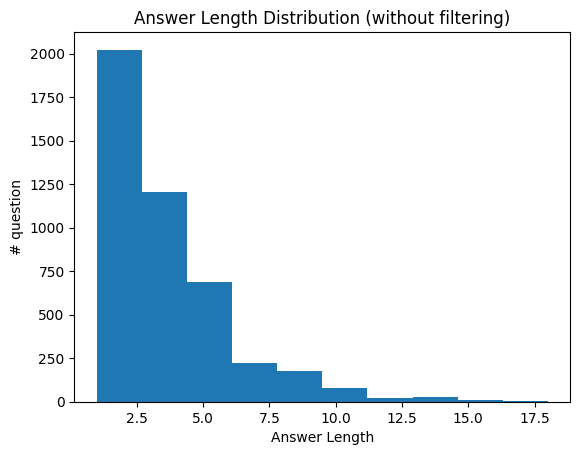

In [81]:
plt.hist([float(len(vars.GPT_4_TOKENIZER(str(a)))) for a in answered_df_prefilter["answer"].to_list()])
plt.xlabel("Answer Length")
plt.ylabel("# question")
plt.title("Answer Length Distribution (without filtering)")

In [84]:
# io.dump_jsonlines(
#      answered_df_prefilter.to_dict("records"), 
#      f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/entity_type_name_template_v1_curated_answered_prefiltered.jsonl"
# )

In [ ]:
# len(answered_df_prefilter)

In [85]:
# # change answer in generation files from model and see if llm_acc change
# eos_sft_df = pd.read_excel("/datastor1/zliu/mend/debug_exp_output/llama3.2-1B-eos-sft-template-format-v2-lr2e-6-sample-10/syn_data_neurips_prefilter_v2/base_n=19945_prompt=no_w-gen_wo-icl_ice=False.xlsx")


In [86]:
# assert all([q1==q2 for q1, q2 in zip(entity_type_name_template_answered_df_filtered_shorten["question"].to_list(), eos_sft_df["question"].to_list())])

In [87]:
# new_eos_sft_df = []
# for i in range(len(entity_type_name_template_answered_df_filtered_shorten)):
#     shortend_r = entity_type_name_template_answered_df_filtered_shorten.iloc[i]
#     eos_sft_r = eos_sft_df.iloc[i]
#     assert shortend_r["question"] == eos_sft_r["question"]
#     new_eos_sft_r = deepcopy(eos_sft_r)
#     new_eos_sft_r["answer"] = shortend_r["answer"]
#     new_eos_sft_df.append(new_eos_sft_r)
# new_eos_sft_df = pd.DataFrame(new_eos_sft_df)

In [88]:
# new_eos_sft_df.drop(columns=["llm_accuracy"], inplace=True)

# Prepare a light-weight data for format alignment

In [92]:
sample_size = 10
light_weight_sft_content = []
for template, template_df in answered_df_prefilter.groupby("template"):
    light_weight_sft_content.extend(template_df.sample(sample_size).to_dict(orient="records"))
len(light_weight_sft_content)

480

In [94]:
io.dump_jsonlines(light_weight_sft_content, f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/model_prep/light_weight_sft_content_curated_v1_sample={sample_size}.jsonl",)

In [91]:
# len(entity_type_name_template_answered_df_filtered_shorten.iloc[20145]["answer"])

# measure llama3.2-1B-base model performance

In [164]:
# eos_sft_df = pd.read_excel("/u/zliu/datastor1/mend/debug_exp_output/llama3.2-1B-eos-sft/syn_data_neurips_prefilter/base_n=17461_prompt=no_w-gen_wo-icl_ice=False.xlsx")
# eos_sft_df = pd.read_excel("/datastor1/zliu/mend/debug_exp_output/llama3.2-1B-eos-sft-template-format-lr2e-6-sample-5/syn_data_neurips_prefilter/base_n=17461_prompt=no_w-gen_wo-icl_ice=False.xlsx")
# eos_sft_df = pd.read_excel("/datastor1/zliu/mend/debug_exp_output/llama3.2-1B-eos-sft-template-format-lr2e-6-sample-10/syn_data_neurips_prefilter/base_n=17461_prompt=no_w-gen_wo-icl_ice=False.xlsx")
eos_sft_df = pd.read_excel("/datastor1/zliu/mend/debug_exp_output/llama3.2-1B-eos-sft-template-format-curated-v1-lr2e-6-sample-10/syn_data_neurips_curated_prefilter/base_n=4451_prompt=no_w-gen_wo-icl_ice=False.xlsx")

In [165]:
# pd.read_excel("/datastor1/zliu/mend/debug_exp_output/llama3.2-1B-eos-sft-template-format-v2-lr2e-6-sample-10/syn_data_neurips_prefilter_v2/base_n=19945_prompt=no_w-gen_wo-icl_ice=False.xlsx.bak").describe()

In [166]:
llm_threshold = 0.4

In [167]:
eos_sft_df.describe()

,id,predicted_answer_idx,exact_match,llm_accuracy
count,4451.000000,4451.0,4451.000000,4451.000000
mean,2225.000000,0.0,0.492474,0.706852
std,1285.037354,0.0,0.500000,0.398328
min,0.000000,0.0,0.000000,0.000000
25%,1112.500000,0.0,0.000000,0.300000
50%,2225.000000,0.0,0.000000,1.000000
75%,3337.500000,0.0,1.000000,1.000000
max,4450.000000,0.0,1.000000,1.000000


In [168]:
len(eos_sft_df[eos_sft_df["llm_accuracy"] > llm_threshold])

3205

In [169]:
eos_sft_df_filtered = eos_sft_df[eos_sft_df["llm_accuracy"] > llm_threshold]

In [170]:
# Counter(eos_sft_df[eos_sft_df["template"] == "Where was {invention} created?"]["answer"])

In [171]:
eos_sft_df_filtered.describe()

,id,predicted_answer_idx,exact_match,llm_accuracy
count,3205.000000,3205.0,3205.000000,3205.000000
mean,2312.938846,0.0,0.683931,0.940655
std,1326.710679,0.0,0.465013,0.130605
min,3.000000,0.0,0.000000,0.500000
25%,1132.000000,0.0,0.000000,1.000000
50%,2368.000000,0.0,1.000000,1.000000
75%,3501.000000,0.0,1.000000,1.000000
max,4449.000000,0.0,1.000000,1.000000


Text(0.5, 1.0, 'LLM Accuracy Distribution (without filtering)')

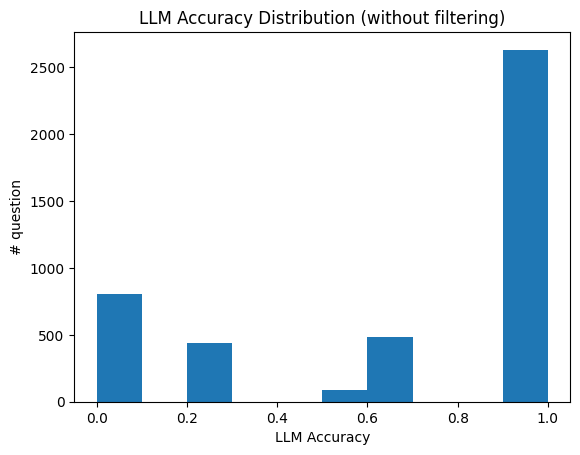

In [172]:
plt.hist(eos_sft_df["llm_accuracy"])
plt.xlabel("LLM Accuracy")
plt.ylabel("# question")
plt.title("LLM Accuracy Distribution (without filtering)")

In [173]:
len(eos_sft_df["answer"].to_list())

4451

In [174]:
vars.GPT_4_TOKENIZER("Writers, calligraphers, enthusiasts, professionals")

[54, 32929, 11, 1650, 54967, 388, 11, 43448, 11, 15749]

In [175]:
# [a for a in eos_sft_df_filtered["answer"].to_list() if len(a) == 96]

In [176]:
# [a for a in eos_sft_df_filtered["answer"].to_list() if len(vars.GPT_4_TOKENIZER(str(a))) >= 10]

In [177]:
# Counter(eos_sft_df_filtered[eos_sft_df_filtered["answer"].apply(lambda x: len(str(x)) > 30)]["template"])

In [178]:
# [a for a in eos_sft_df["answer"].to_list() if len(str(a)) == 30]

Text(0.5, 1.0, 'Answer Length Distribution (without filtering)')

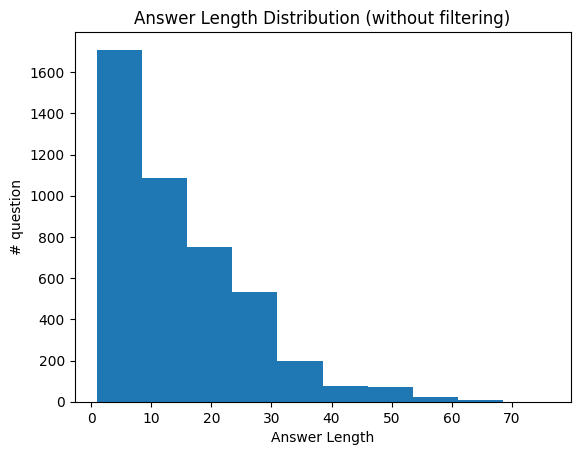

In [179]:
plt.hist([float(len(str(a))) for a in eos_sft_df["answer"].to_list()])
plt.xlabel("Answer Length")
plt.ylabel("# question")
plt.title("Answer Length Distribution (without filtering)")

In [180]:
eos_entity_type2count = {}
eos_entity_type2acc = {}
eos_entity_type2length = {}
eos_template2entity_names = defaultdict(list)

for i, d in eos_sft_df_filtered.iterrows():
    if d["entity_type"] not in eos_entity_type2count:
        eos_entity_type2count[d["entity_type"]] = defaultdict(int)
        eos_entity_type2acc[d["entity_type"]] = defaultdict(int)
        eos_entity_type2length[d["entity_type"]] = defaultdict(int)
        
    eos_entity_type2count[d["entity_type"]][d["template"]] += 1
    eos_template2entity_names[d["template"]].append(d["entity_name"])
    eos_entity_type2acc[d["entity_type"]][d["template"]] += d["llm_accuracy"]
    eos_entity_type2length[d["entity_type"]][d["template"]] += len(vars.GPT_4_TOKENIZER(str(d["answer"]).strip()))
        

In [181]:
# bad_question_templates = ["How many children did {person} have?", "What language family does {language} belong to?", "What is the national flower of {country}?", "When did {country} join the United Nations?", "What triggered {event}?", "What is the national anthem of {country} called?", "What is the date of {country}’s national day or independence day?", "What is the founding year of {country}?", "What legal system does {country} use?", "Which side is considered to have \"won\" {event}?", "What is the diet of {species}?"]
bad_question_templates = []
bad_entity_types = []

In [182]:
# eos_template2entity_names

In [183]:
counts = []
spotcheck_df_content = []
count_threshold = 0
entity_type2template_count = defaultdict(int)


for entity_type in eos_entity_type2count.keys():
    if entity_type in bad_entity_types:
        continue
    print(entity_type)
    for template in eos_entity_type2count[entity_type].keys():
        if template in bad_question_templates:
            continue
    
        acc_sum = eos_entity_type2acc[entity_type][template]
        count = eos_entity_type2count[entity_type][template]
        counts.append(count)
        
        acc = acc_sum / count
        spotcheck_df_content.append({
            "entity_type": entity_type,
            "template": template,
            "count": count,
            "accuracy": acc,
        })
        if count > count_threshold:
            entity_type2template_count[entity_type] += 1
            print(template, ":", acc, f"(count={count})")
    print("===" * 20)

Person
How many children did {person} have? : 1.0 (count=13)
What is the religion of {person}? : 0.9387096774193552 (count=62)
What language was primarily spoken by {person}? : 0.9795180722891568 (count=83)
What occupation is {person} most well-known for? : 0.9046511627906981 (count=86)
What year did {person} pass away? : 1.0 (count=79)
What year was {person} born? : 1.0 (count=80)
Where did {person} die? : 0.9520000000000002 (count=50)
Where was the birthplace of {person}? : 0.9484375000000003 (count=64)
Organization
In what year was {organization} established? : 1.0 (count=87)
Where is the headquarters of {organization} located? : 0.9967032967032967 (count=91)
Where was {organization} established? : 0.9543478260869568 (count=92)
Who established {organization}? : 0.865909090909091 (count=44)
What is the primary field or industry of {organization}? : 0.8870370370370375 (count=108)
What primary service or product does {organization} provide? : 0.8320388349514571 (count=103)
Product
What

In [184]:
from itertools import combinations

def find_largest_intersection_at_least_m_sets(sets, m):
    """
    Find the largest intersection set using at least m sets from the given list of K sets.
    
    Args:
        sets: A list of sets, each containing elements
        m: Minimum number of sets to use for the intersection
    
    Returns:
        A tuple containing:
        - The largest intersection set
        - A list of indices of the sets that produce this largest intersection
    """
    if not sets or m <= 0 or m > len(sets):
        return set(), []  # Invalid input
    
    max_intersection_size = -1
    max_intersection_set = set()
    max_intersection_indices = []
    
    # Try finding the largest intersection with exactly j sets where j ranges from m to K
    for j in range(m, len(sets) + 1):
        # Try all combinations of j sets from the K sets
        for indices in combinations(range(len(sets)), j):
            # Calculate the intersection of the selected j sets
            selected_sets = [sets[i] for i in indices]
            intersection = set.intersection(*selected_sets)
            
            # Update maximum if this intersection is larger
            if len(intersection) > max_intersection_size:
                max_intersection_size = len(intersection)
                max_intersection_set = intersection
                max_intersection_indices = list(indices)
    
    return max_intersection_set, max_intersection_indices

In [185]:
set_list = [set(eos_template2entity_names[template]) for template in entity_type2templates["Person"]]

largest_overlap, set_ids = find_largest_intersection_at_least_m_sets(set_list, 5)
print(len(largest_overlap), len(set_ids), )

43 5


In [186]:
sanity_check_set = set_list[set_ids[0]]
for i in range(1, len(set_ids)):
    sanity_check_set = sanity_check_set.intersection(set_list[set_ids[i]])
len(sanity_check_set)

43

In [187]:
max_rel_config = dict([
    ("Person", 6),
    ("Event", 4),
    ("Species", 4),
    ("Language", 5),
    ("Organization", 6),
    ("Creative Work", 6),
    ("Country", 8),]
)

In [188]:
max_entity_config = [
    ("Person", 4),
    ("Event", 4),
    ("Species", 4),
    ("Language", 4),
    ("Organization", 4),
    ("Creative Work", 4),
    ("Country", 4),
]

In [189]:
eos_sft_df_filtered.columns

Index(['id', 'question_type', 'template', 'entity_name', 'entity_type',
       'input', 'stage', 'question', 'answer', 'predicted_answer_idx',
       'predicted_answer', 'exact_match', 'llm_accuracy'],
      dtype='object')

In [251]:
entity2nrel = max_rel_config
n_entity = 0
n_rel = 0
entity_type2filtered_entities = {}
entity_type2filtered_templates = {}
prefinalized_df_content = []

for entity_type, entity_templates in entity_type2templates.items():
    if entity_type not in entity2nrel:
        continue
    print(entity_type)
    entity_set_list = [set(eos_template2entity_names[template]) for template in entity_templates]
    largest_entity_overlap, largest_entity_set_ids = find_largest_intersection_at_least_m_sets(entity_set_list, entity2nrel[entity_type])
    entity_type2filtered_entities[entity_type] = largest_entity_overlap
    entity_type2filtered_templates[entity_type] = [entity_templates[i] for i in largest_entity_set_ids]
    prefinalized_df_content.append(
        eos_sft_df_filtered[(eos_sft_df_filtered["entity_type"] == entity_type) & (eos_sft_df_filtered["entity_name"].isin(largest_entity_overlap)) & (eos_sft_df_filtered["template"].isin(entity_type2filtered_templates[entity_type]))]
    )
    
    n_entity += len(largest_entity_overlap)
    n_rel += len(largest_entity_set_ids)
    print("# entity:", len(largest_entity_overlap))
    print("# templates:", len(largest_entity_set_ids))
print("===" * 20)

print("# total entity:", n_entity)
print("# total relation:", n_rel)
prefinalized_df = pd.concat(prefinalized_df_content)

Person
# entity: 26
# templates: 6
Event
# entity: 35
# templates: 4
Species
# entity: 25
# templates: 4
Language
# entity: 21
# templates: 5
Organization
# entity: 22
# templates: 6
Creative Work
# entity: 21
# templates: 6
Country
# entity: 36
# templates: 8
# total entity: 186
# total relation: 39


In [236]:
# a_df = prefinalized_df[prefinalized_df["template"] == "What is the primary field or industry of {organization}?"]

In [237]:
# list(zip(a_df["answer"].to_list(), a_df["predicted_answer"].to_list()))

In [238]:
# prefinalized_df["template"].unique()

In [240]:
# 

In [242]:

# # io.dump_jsonlines(
# #     prefinalized_df.drop(columns=["llm_accuracy", "predicted_answer_idx", "predicted_answer", "exact_match", "question_type", "stage", "id", "input"], inplace=False).to_dict("records"), 
# #     f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/entity_type_name_template_v1_curated_answered_postfiltered.jsonl"
# # )
# sample_size = 10
# light_weight_sft_content = []
# for template, template_df in prefinalized_df.groupby("template"):
#     light_weight_sft_content.extend(template_df.sample(sample_size).to_dict(orient="records"))
# len(light_weight_sft_content)

In [243]:
# io.dump_jsonlines(light_weight_sft_content, f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/model_prep/light_weight_sft_content_curated_v1_finalized_sample={sample_size}.jsonl",)

Text(0.5, 1.0, 'Answer Length Distribution (after filtering)')

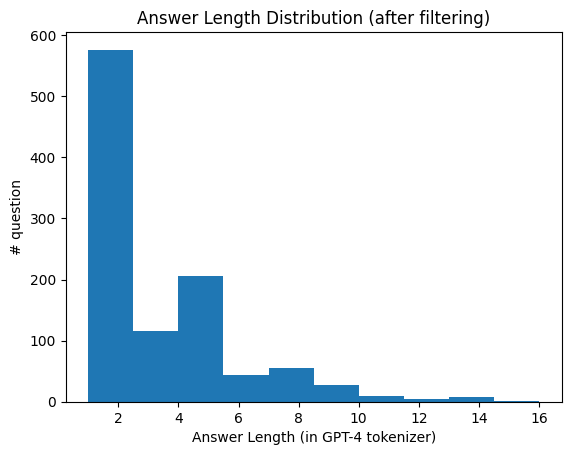

In [244]:
plt.hist([float(len(vars.GPT_4_TOKENIZER(str(a)))) for a in prefinalized_df["answer"].to_list()])
plt.xlabel("Answer Length (in GPT-4 tokenizer)")
plt.ylabel("# question")
plt.title("Answer Length Distribution (after filtering)")

In [245]:
float()

0.0

In [290]:
spotcheck_df_content = []
entity_spotcheck_df_content = []

question2answer = {}

for (entity_type, template), sub_df in prefinalized_df.groupby(["entity_type", "template"]):
    # pass
    acc = np.mean(sub_df["llm_accuracy"].to_list())
    length = float(np.mean([len(vars.GPT_4_TOKENIZER(a)) for a in sub_df["answer"].to_list()]))
    count = len(sub_df)
    # counts.append(count)
    rand_idx = np.random.randint(len(sub_df))
    for i, r in sub_df.iterrows():
        entity_spotcheck_df_content.append({
            "entity_type": entity_type,
            "entity_name": r["entity_name"],
        })
        # entity_type2entity_names_final[entity_type].append(r["entity_name"])
        # entity_type2templates_final[entity_type].append(r["template"])
        question2answer[r["question"]] = r["answer"]
    
    spotcheck_df_content.append({
        "entity_type": entity_type,
        "template": template,
        "# entity": count,
        "avg_llm_accuracy": acc,
        "avg_answer_len (in GPT4 tokens)": length,
        "example_question": sub_df.iloc[rand_idx]["question"],
        "example_answer": sub_df.iloc[rand_idx]["answer"],
        "example_prediction": sub_df.iloc[rand_idx]["predicted_answer"],
    })

In [257]:
# entity_type2templates_final = {et: list(set(ts)) for et, ts in entity_type2templates_final.items()}

In [291]:
len(question2answer)

1047

In [292]:
len(prefinalized_df)

1047

In [229]:
spotcheck_df = pd.DataFrame(spotcheck_df_content)
entity_spotcheck_df = pd.DataFrame(entity_spotcheck_df_content).drop_duplicates()
spotcheck_df = spotcheck_df.set_index(["entity_type", "template"], drop=True)
entity_spotcheck_df = entity_spotcheck_df.set_index(["entity_type",], drop=True)

In [201]:
spotcheck_df

# entity  \
entity_type   template                                                       
Country       What is the ISO alpha-2 code for {country}?               36   
              What is the calling code for {country}?                   36   
              What is the capital of {country}?                         36   
              What is the currency of {country}?                        36   
              What is the top-level internet domain for {coun...        36   
              What language in {country} has the most speakers?         36   
              Which ethnic group is the largest in {country}?           36   
              Which religion has the most followers in {count...        36   
Creative Work In which country was {creative_work} first rele...        21   
              What is the genre or style of {creative_work}?            21   
              What is the original language of {creative_work}?         21   
              When was {creative_work} released or published?           21   
              Where was {creative_work} produced or created?            21   
              Who is the creator of {creative_work}?                    21   
Event         In which country did {event} happen?                      35   
              What year did {event} end?                                35   
              When did {event} take place?                              35   
              Who was the most important leader or figure inv...        35   
Language      What is the ISO 639‑1 code for {language}?                21   
              What is the name of the alphabet or script of {...        21   
              What is the primary word order in {language}?             21   
              What region is {language} native to?                      21   
              What writing system is used by {language}?                21   
Organization  In what year was {organization} established?              22   
              What is the primary field or industry of {organ...        22   
              What primary service or product does {organizat...        22   
              Where is the headquarters of {organization} loc...        22   
              Where was {organization} established?                     22   
              Who established {organization}?                           22   
Person        What language was primarily spoken by {person}?           26   
              What occupation is {person} most well-known for?          26   
              What year did {person} pass away?                         26   
              What year was {person} born?                              26   
              Where did {person} die?                                   26   
              Where was the birthplace of {person}?                     26   
Species       What is the diet of {species}?                            25   
              What is the social structure of {species}?                25   
              What type of organism is this {species}?                  25   
              Where is {species} primarily native to?                   25   

                                                                  avg_llm_accuracy  \
entity_type   template                                                               
Country       What is the ISO alpha-2 code for {country}?                 1.000000   
              What is the calling code for {country}?                     1.000000   
              What is the capital of {country}?                           1.000000   
              What is the currency of {country}?                          0.983333   
              What is the top-level internet domain for {coun...          1.000000   
              What language in {country} has the most speakers?           0.991667   
              Which ethnic group is the largest in {country}?             0.975000   
              Which religion has the most followers in {count...          0.975000   
Creativ

In [202]:
spotcheck_df.to_excel(f"/u/zliu/datastor1/mend/spotcheck/spotcheck_df_curated_v1_rel.xlsx", index=True)

In [203]:
entity_spotcheck_df
entity_spotcheck_df.to_excel(f"/u/zliu/datastor1/mend/spotcheck/spotcheck_df_curated_v1_entity.xlsx", index=True)

In [259]:
# entity_type2filtered_templates

In [260]:
# io.dump_json({k: list(vs) for k, vs in entity_type2filtered_entities.items()}, f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/entity_type2entities_curated_final.json")

In [ ]:
# io.dump_json({et: list(set(ts)) for et, ts in entity_type2filtered_templates.items()}, f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/entity_type2relations_curated_final.json")

In [ ]:
# io.dump_json(question2answer, f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/question2answer_curated_final.json")

In [263]:
# len(question2answer)

In [314]:
all_templates = [(et, t) for et in entity_type2filtered_templates.keys() for t in entity_type2filtered_templates[et]]
print("# templates:", len(all_templates))
all_entities = [(et, e) for et in entity_type2filtered_entities.keys() for e in entity_type2filtered_entities[et]]
print("# entities:", len(all_entities))
io.dump_json(all_templates, f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/all_relations.json")
io.dump_json(all_entities, f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/all_entities.json")

# templates: 39
# entities: 186


In [315]:
rand_template_ids = np.arange(len(all_templates))
np.random.shuffle(rand_template_ids)
rand_entity_ids = np.arange(len(all_entities))
np.random.shuffle(rand_entity_ids)

In [316]:
ood_template_ids = rand_template_ids[:int(len(rand_template_ids) * 0.2)]
ood_entity_ids = rand_entity_ids[:int(len(rand_entity_ids) * 0.2)]
id_template_ids = rand_template_ids[int(len(rand_template_ids) * 0.2):]
id_entity_ids = rand_entity_ids[int(len(rand_entity_ids) * 0.2):]

id_templates = [
    all_templates[i] for i in id_template_ids
]
id_entities = [
    all_entities[i] for i in id_entity_ids
]
print("# ID templates:", len(id_templates))
print("# ID entities:", len(id_entities))

ood_templates = [
    all_templates[i] for i in ood_template_ids
]
ood_entities = [
    all_entities[i] for i in ood_entity_ids
]
print("# OOD templates:", len(ood_templates))
print("# OOD entities:", len(ood_entit))

print("Entity Distribution of OOD templates")
print(Counter([et for et, _ in ood_entities]))

print("Relation Distribution of OOD templates")
print(Counter([et for et, _ in ood_templates]))

# ID templates: 32
# ID entities: 149
# OOD templates: 7
# OOD entities: 37
Entity Distribution of OOD templates
Counter({'Event': 7, 'Country': 6, 'Language': 6, 'Creative Work': 5, 'Person': 5, 'Organization': 4, 'Species': 4})
Relation Distribution of OOD templates
Counter({'Creative Work': 2, 'Event': 1, 'Organization': 1, 'Person': 1, 'Country': 1, 'Language': 1})


In [313]:
# ood_templates = defaultdict(list)
# for et, t in ood_templates:
#     ood_templates[et].append(t)
# ood_entities = defaultdict(list)
# for et, e in ood_entities:
#     ood_entities[et].append(e)
# id_templates = defaultdict(list)
# for et, t in id_templates:
#     id_templates[et].append(t)
# id_entities = defaultdict(list)
# for et, e in id_entities:
#     id_entities[et].append(e)

In [ ]:
io.dump_json({"id": id_templates, "ood": ood_templates}, f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/exp_relations.json")
io.dump_json({"id": id_entities, "ood": ood_entities}, f"{vars.DATA_DIR}/debug_meta_train/syn_data_neurips/data_gen/exp_entities.json")

# Sampling entity and template for data